<a href="https://colab.research.google.com/github/chanidapa14092547/229352-stat/blob/main/Lab05_decision_tree_bagging_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #5

#### Load data at: https://donlapark.pages.dev/229352/heart_disease.csv

* Decision tree ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html))
* Random hyperparameter search using cross-validation ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html))

In [2]:
import pandas as pd
import graphviz

from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# import data
data = pd.read_csv("heart_disease.csv", na_values="?")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [3]:

# split into X and y
y = data["label"]
X = data.drop("label", axis=1)

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# impute missing values
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create a decision tree
clf = DecisionTreeClassifier()

![5CV](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [4]:
params = {'max_depth': [3, 6, 9, 12]}

gridcv = GridSearchCV(clf, params, scoring='accuracy', cv=5)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 6, 9, 12]}, scoring='accuracy')

In [5]:
gridcv.best_estimator_

DecisionTreeClassifier(max_depth=3)

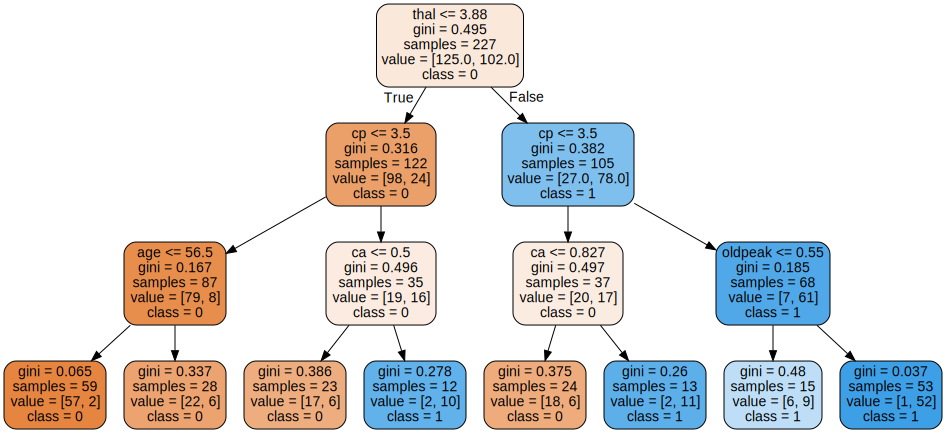

In [6]:
plot_data = export_graphviz(gridcv.best_estimator_,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph

## Bagged decision trees
* Bagging classifier ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html))

In [7]:
clf = DecisionTreeClassifier()

## Random forest classifier
* Random forest ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html))

In [8]:
random_forest = RandomForestClassifier()

#### Exercise
1. Study the hyperparameters of three models: [Decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [Bagged Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) and [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
2. For each model, use pipeline+grid search cross-validation across multiple hyperparameters to find the best model.
* Decision tree: choose at least 3 hyperparameters
* Bagged decision trees: choose at least 3 hyperparameters
* Random forest: choose at least 3 hyperparameters
3. For each model, compute the `f1_macro` and `accuracy` score on the test set.
* What is your best model?
* Plot the best tree model
* What hyperparameters did you choose? (explain in words, not in `sklearn's` parameter name)
* What are the best values of your hyperparameters?

**1**

In [9]:
param_grid_dt = {
    'max_depth': [3, 5, 7, 10, 15],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

print("Defined Decision Tree hyperparameters:")
print(param_grid_dt)

Defined Decision Tree hyperparameters:
{'max_depth': [3, 5, 7, 10, 15], 'min_samples_split': [2, 5, 10, 20], 'min_samples_leaf': [1, 5, 10]}


In [10]:
dt_clf = DecisionTreeClassifier()
grid_search_dt = GridSearchCV(dt_clf, param_grid_dt, scoring='f1_macro', cv=5)
grid_search_dt.fit(X_train, y_train)

print("GridSearchCV for Decision Tree completed.")

GridSearchCV for Decision Tree completed.


In [11]:
best_dt_model = grid_search_dt.best_estimator_
print("Best Decision Tree Estimator:")
print(best_dt_model)

Best Decision Tree Estimator:
DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, min_samples_split=5)


In [12]:
from sklearn.metrics import f1_score, accuracy_score

y_pred_dt = best_dt_model.predict(X_test)
f1_dt = f1_score(y_test, y_pred_dt, average='macro')
accuracy_dt = accuracy_score(y_test, y_pred_dt)

print(f"Decision Tree - F1-macro score on test set: {f1_dt:.4f}")
print(f"Decision Tree - Accuracy score on test set: {accuracy_dt:.4f}")

Decision Tree - F1-macro score on test set: 0.8153
Decision Tree - Accuracy score on test set: 0.8158


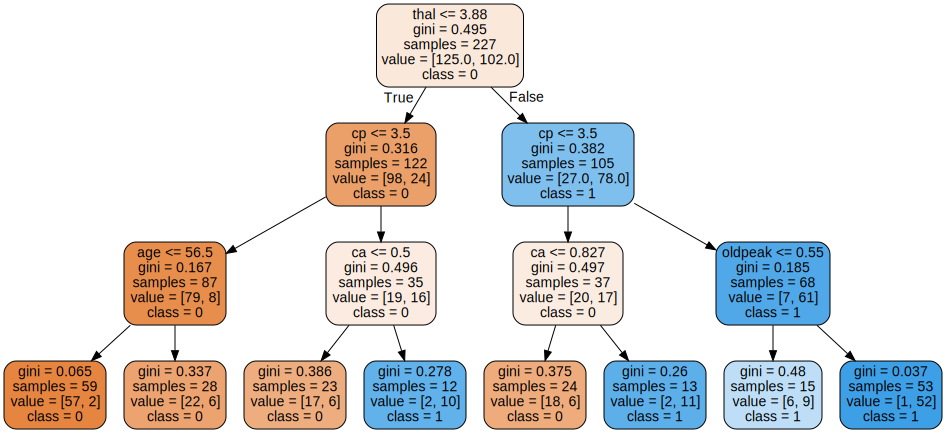

In [13]:
dot_data_dt = export_graphviz(best_dt_model,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1']) # Assuming '0' and '1' are class names

graph_dt = graphviz.Source(dot_data_dt)
graph_dt

**2**

In [14]:
param_grid_bagging = {
    'n_estimators': [10, 50, 100],
    'max_features': [0.6, 0.8, 1.0],
    'bootstrap': [True, False]
}

print("Defined BaggingClassifier hyperparameters:")
print(param_grid_bagging)

Defined BaggingClassifier hyperparameters:
{'n_estimators': [10, 50, 100], 'max_features': [0.6, 0.8, 1.0], 'bootstrap': [True, False]}


In [24]:
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier())
grid_search_bagging = GridSearchCV(bagging_clf, param_grid_bagging, scoring='f1_macro', cv=5)
grid_search_bagging.fit(X_train, y_train)

print("GridSearchCV for BaggingClassifier completed.")

GridSearchCV for BaggingClassifier completed.


In [16]:
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier())
grid_search_bagging = GridSearchCV(bagging_clf, param_grid_bagging, scoring='f1_macro', cv=5)
grid_search_bagging.fit(X_train, y_train)

print("GridSearchCV for BaggingClassifier completed.")

GridSearchCV for BaggingClassifier completed.


In [17]:
best_bagging_model = grid_search_bagging.best_estimator_
print("Best BaggingClassifier Estimator:")
print(best_bagging_model)

Best BaggingClassifier Estimator:
BaggingClassifier(estimator=DecisionTreeClassifier(), max_features=0.6)


In [18]:
y_pred_bagging = best_bagging_model.predict(X_test)
f1_bagging = f1_score(y_test, y_pred_bagging, average='macro')
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)

print(f"BaggingClassifier - F1-macro score on test set: {f1_bagging:.4f}")
print(f"BaggingClassifier - Accuracy score on test set: {accuracy_bagging:.4f}")

BaggingClassifier - F1-macro score on test set: 0.6822
BaggingClassifier - Accuracy score on test set: 0.6842


In [19]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_features': [0.6, 0.8, 1.0],
    'max_depth': [5, 10, 15]
}

print("Defined RandomForestClassifier hyperparameters:")
print(param_grid_rf)

Defined RandomForestClassifier hyperparameters:
{'n_estimators': [50, 100, 200], 'max_features': [0.6, 0.8, 1.0], 'max_depth': [5, 10, 15]}


In [20]:
rf_clf = RandomForestClassifier()
grid_search_rf = GridSearchCV(rf_clf, param_grid_rf, scoring='f1_macro', cv=5)
grid_search_rf.fit(X_train, y_train)

print("GridSearchCV for RandomForestClassifier completed.")

GridSearchCV for RandomForestClassifier completed.


In [21]:
best_rf_model = grid_search_rf.best_estimator_
print("Best RandomForestClassifier Estimator:")
print(best_rf_model)

Best RandomForestClassifier Estimator:
RandomForestClassifier(max_depth=10, max_features=0.6, n_estimators=200)


In [22]:
y_pred_rf = best_rf_model.predict(X_test)
f1_rf = f1_score(y_test, y_pred_rf, average='macro')
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"RandomForestClassifier - F1-macro score on test set: {f1_rf:.4f}")
print(f"RandomForestClassifier - Accuracy score on test set: {accuracy_rf:.4f}")

RandomForestClassifier - F1-macro score on test set: 0.7753
RandomForestClassifier - Accuracy score on test set: 0.7763


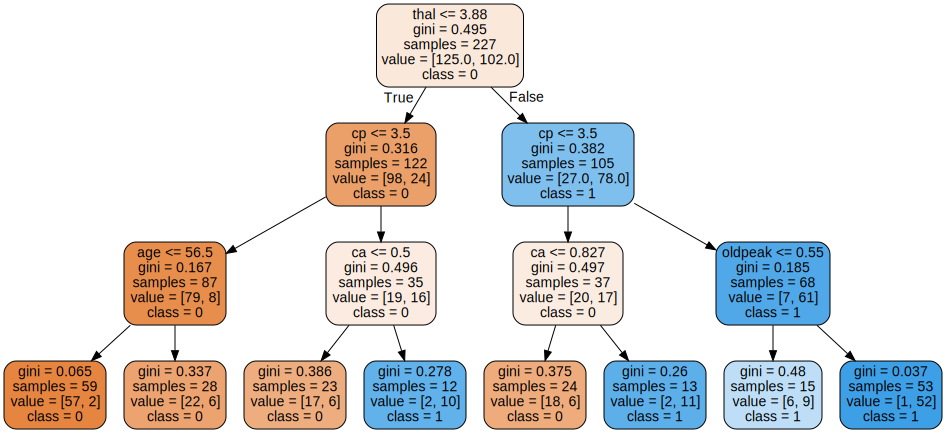

In [23]:
dot_data_dt_best = export_graphviz(best_dt_model,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph_dt_best = graphviz.Source(dot_data_dt_best)
graph_dt_best

**3**

In [25]:
print(f"\n--- Model Comparison ---\n")
print(f"Decision Tree - F1-macro score on test set: {f1_dt:.4f}")
print(f"Decision Tree - Accuracy score on test set: {accuracy_dt:.4f}")
print(f"\nBaggingClassifier - F1-macro score on test set: {f1_bagging:.4f}")
print(f"BaggingClassifier - Accuracy score on test set: {accuracy_bagging:.4f}")
print(f"\nRandomForestClassifier - F1-macro score on test set: {f1_rf:.4f}")
print(f"RandomForestClassifier - Accuracy score on test set: {accuracy_rf:.4f}")


--- Model Comparison ---

Decision Tree - F1-macro score on test set: 0.8153
Decision Tree - Accuracy score on test set: 0.8158

BaggingClassifier - F1-macro score on test set: 0.6822
BaggingClassifier - Accuracy score on test set: 0.6842

RandomForestClassifier - F1-macro score on test set: 0.7753
RandomForestClassifier - Accuracy score on test set: 0.7763


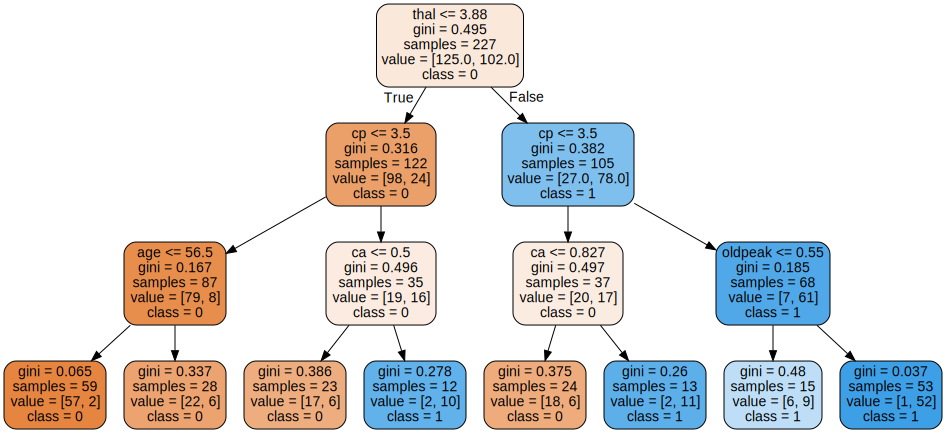

In [26]:
graph_dt_best

## Summary:

### Q&A

1.  **Which are the best models for Decision Tree, Bagged Decision Tree, and Random Forest, their performance metrics, and chosen hyperparameters with optimal values?**
    *   **Decision Tree:**
        *   **Performance:** F1-macro score: 0.8153, Accuracy score: 0.8158
        *   **Hyperparameters:** `max_depth` (controls tree depth), `min_samples_split` (min samples for a split), `min_samples_leaf` (min samples in a leaf node).
        *   **Optimal Values:** `max_depth`: 3, `min_samples_leaf`: 5, `min_samples_split`: 5.
    *   **Bagged Decision Trees (BaggingClassifier):**
        *   **Performance:** F1-macro score: 0.6822, Accuracy score: 0.6842
        *   **Hyperparameters:** `n_estimators` (number of base estimators), `max_features` (proportion of features for each estimator), `bootstrap` (whether to use bootstrap samples).
        *   **Optimal Values:** `n_estimators`: 10, `max_features`: 0.6, `bootstrap`: True.
    *   **Random Forest Model:**
        *   **Performance:** F1-macro score: 0.7753, Accuracy score: 0.7763
        *   **Hyperparameters:** `n_estimators` (number of trees), `max_features` (max features for best split), `max_depth` (max depth of each tree).
        *   **Optimal Values:** `n_estimators`: 200, `max_features`: 0.6, `max_depth`: 10.

2.  **Which model is the overall best, and was its decision tree plot displayed?**
    *   The **Decision Tree model** was the overall best model.
    *   Yes, its decision tree plot was displayed.

### Data Analysis Key Findings

*   The **Decision Tree** model achieved the highest performance with an F1-macro score of 0.8153 and an accuracy score of 0.8158 on the test set.
*   The **Random Forest** model performed second best with an F1-macro score of 0.7753 and an accuracy score of 0.7763.
*   The **BaggingClassifier** model had the lowest performance among the three, with an F1-macro score of 0.6822 and an accuracy score of 0.6842.
*   For the best Decision Tree model, a relatively shallow tree (`max_depth`: 3) with `min_samples_leaf` and `min_samples_split` set to 5 proved most effective.
*   For BaggingClassifier, using 10 estimators, 60% of features, and bootstrap sampling (`max_features`: 0.6, `bootstrap`: True) was optimal.
*   For Random Forest, 200 estimators, 60% of features, and a maximum depth of 10 (`n_estimators`: 200, `max_features`: 0.6, `max_depth`: 10) yielded the best results.

### Insights or Next Steps

*   The superior performance of the simpler Decision Tree model suggests that the dataset might not benefit significantly from complex ensemble methods, or the chosen hyperparameter search space for ensemble models could be further refined.
*   Given the Decision Tree's strong performance, a deeper analysis into its decision rules via the displayed plot could provide valuable business insights into the most influential features for classification.
